In [1]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

import pickle
import numpy as np

Using TensorFlow backend.


In [2]:
def createModel():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32,32,3)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
     
    return model

In [3]:
model = createModel()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
__________

In [4]:
def unpickle(file):
    fo = open(file, 'rb')
    data = pickle.load(fo, encoding='bytes')
    fo.close()
    encoded_data = {}
    for i in data:
        encoded_data[str(i, 'utf-8')] = data[i]
    encoded_data['batch_label'] = str(encoded_data['batch_label'], 'utf-8')
    encoded_data['filenames'] = [str(i, 'utf-8') for i in encoded_data['filenames']]
    return encoded_data

In [5]:
features = []
output = []
for j in range(5):
    data = unpickle('cifar-10-batches-py/data_batch_'+ str(j+1))
    x = data['data']
    y = data['labels']
    features.append(x)
    output.append(y)

data = unpickle('cifar-10-batches-py/test_batch')
features.append(data['data'])
output.append(data['labels'])

In [6]:
x = np.concatenate(features)/np.float32(255)
y = np.concatenate(output)
x = np.dstack((x[:, :1024], x[:, 1024:2048], x[:, 2048:]))
x = x.reshape((x.shape[0], 32, 32, 3))

# normalize the data
pixel_mean = np.mean(x[0:50000],axis=0)
x -= pixel_mean

In [8]:
new_y = np.zeros((y.size,10))
for i in range(y.size):
    new_y[i, y[i]] = 1

In [12]:
X_train = x[0:20000,:,:,:]
X_test = x[50000:,:,:,:]
Y_train = new_y[0:20000]
Y_test = new_y[50000:]

In [14]:
model = createModel()
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
 
history1 = model.fit(X_train, Y_train, batch_size=256, epochs=50, verbose=1, validation_data=(X_test, Y_test))
 
model.evaluate(X_test, Y_test)

Train on 20000 samples, validate on 10000 samples
Epoch 1/50
20000/20000 [==============================] - 1006s 50ms/step - loss: 2.1310 - acc: 0.2035 - val_loss: 1.9916 - val_acc: 0.2938
Epoch 2/50
20000/20000 [==============================] - 766s 38ms/step - loss: 1.8938 - acc: 0.2974 - val_loss: 1.9173 - val_acc: 0.3053
Epoch 3/50
20000/20000 [==============================] - 769s 38ms/step - loss: 1.7306 - acc: 0.3629 - val_loss: 1.6410 - val_acc: 0.4061
Epoch 4/50
20000/20000 [==============================] - 982s 49ms/step - loss: 1.6007 - acc: 0.4142 - val_loss: 1.7707 - val_acc: 0.3767
Epoch 5/50
20000/20000 [==============================] - 667s 33ms/step - loss: 1.5146 - acc: 0.4459 - val_loss: 1.4658 - val_acc: 0.4781
Epoch 6/50
20000/20000 [==============================] - 671s 34ms/step - loss: 1.4398 - acc: 0.4754 - val_loss: 1.4009 - val_acc: 0.4834
Epoch 7/50
20000/20000 [==============================] - 672s 34ms/step - loss: 1.3745 - acc: 0.5048 - val_loss: 1

[1.4844548551559449, 0.6507]

In [82]:
actual_output = np.argmax(Y_test[:], axis=1)

In [83]:
predicted_output = np.argmax(model.predict(X_test[:]), axis = 1)

In [84]:
number_of_correct_prediction =  sum(actual_output == predicted_output)

In [85]:
accuracy = number_of_correct_prediction/len(predicted_output)

In [88]:
print( 'accuracy = ', accuracy*100, "%")

accuracy =  65.07 %


In [89]:
weights = model.get_weights()

In [107]:
len(weights)

16

In [109]:
weights[0][0].shape

(3, 3, 32)

In [110]:
img.shape

(32, 32, 3)

In [90]:
import matplotlib.pyplot as plt

In [172]:
from keras import backend as K
import time

In [114]:
inp = model.input 

In [115]:
outputs = [layer.output for layer in model.layers]  

In [116]:
functors = [K.function([inp, K.learning_phase()], [out]) for out in outputs] 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


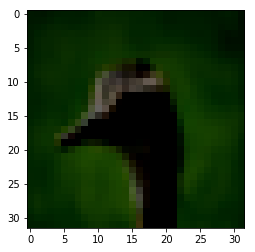

In [273]:
img = X_test[765]
plt.imshow(img)

In [274]:
t = np.expand_dims(img, axis=0)

In [275]:
t.shape

(1, 32, 32, 3)

In [276]:
layer_outs = [func([t, 1.]) for func in functors]

In [277]:
imgs = []

In [278]:
for i in layer_outs[:-4]:
    for j in i:
        k = j[0].T
        for im in k:
#             plt.imshow(im)
            imgs.append(im)

In [279]:
len(imgs)

640

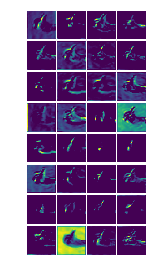

In [280]:
fig = plt.figure()

for i in range(8):
    for j in range(4):
        plt.subplot2grid((8, 4), (i,j))
        plt.imshow(imgs[i*4+j])
        plt.axis('off')
        plt.subplots_adjust(hspace=0.05, wspace=0.05, bottom=0.05, right=0.4, top=0.9)
        

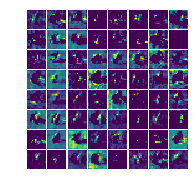

In [281]:
fig = plt.figure()

for i in range(8):
    for j in range(8):
        plt.subplot2grid((8, 8), (i,j))
        plt.imshow(imgs[128+i*8+j])
        plt.axis('off')
        plt.subplots_adjust(hspace=0.05, wspace=0.05, bottom=0.05, right=0.5, top=0.6)

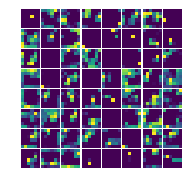

In [282]:
fig = plt.figure()

for i in range(8):
    for j in range(8):
        plt.subplot2grid((8, 8), (i,j))
        plt.imshow(imgs[384+i*8+j])
        plt.axis('off')
        plt.subplots_adjust(hspace=0.05, wspace=0.05, bottom=0.05, right=0.5, top=0.6)

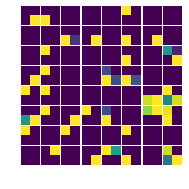

In [283]:
fig = plt.figure()

for i in range(8):
    for j in range(8):
        plt.subplot2grid((8, 8), (i,j))
        plt.imshow(imgs[512+i*8+j])
        plt.axis('off')
        plt.subplots_adjust(hspace=0.05, wspace=0.05, bottom=0.05, right=0.5, top=0.6)